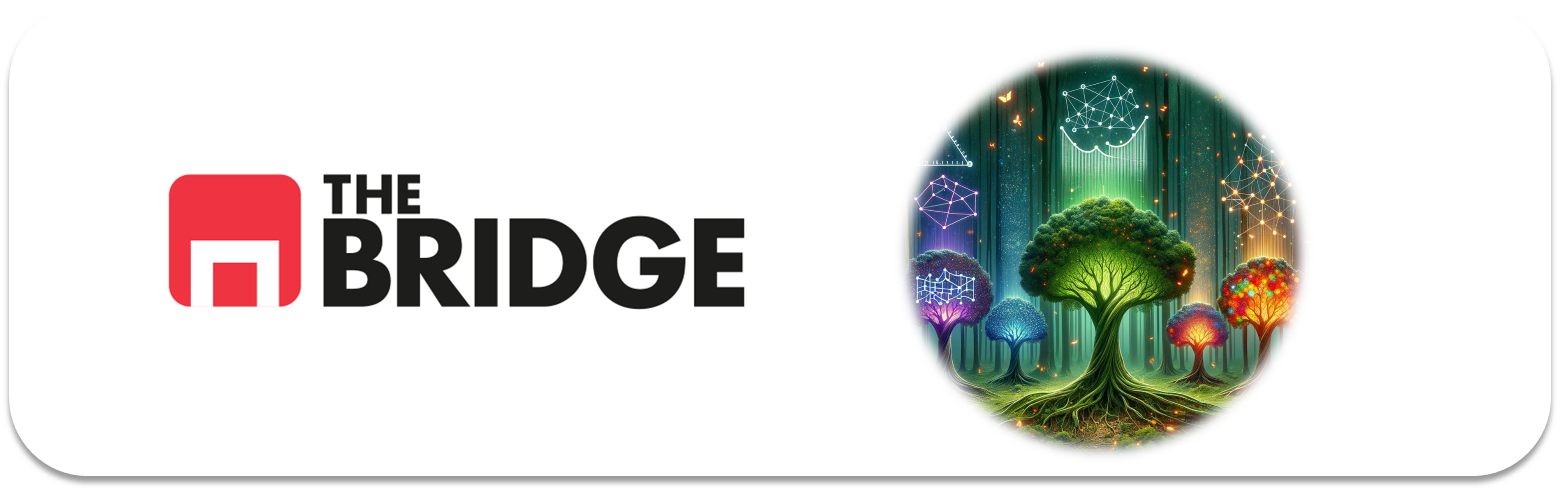

## PRACTICA OBLIGATORIA: **Ensamblado de modelos, bagging, boosting, random forest y gbts**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de obtención del mejor modelo para la resolución de un problema de clasificación sobre diabetes en la india. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

### Descripción del dataset

El dataset de los Pima Indians Diabetes contiene datos de un grupo de mujeres de al menos 21 años de edad de ascendencia india Pima que viven cerca de Phoenix, Arizona, EE. UU. Las características del dataset incluyen varios predictores médicos y un objetivo que indica si la paciente desarrolló diabetes dentro de cinco años.

### Características del Dataset

Las variables incluidas en el dataset son:

1. **Número de Embarazos**: Cantidad de veces embarazada.
2. **Concentración de Glucosa en Plasma**: Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia oral a la glucosa.
3. **Presión Arterial Diastólica**: Presión arterial diastólica (mm Hg).
4. **Grosor del Pliegue Cutáneo del Tríceps**: Grosor del pliegue cutáneo del tríceps (mm).
5. **Insulina en Suero**: Insulina en suero a 2 horas (mu U/ml).
6. **Índice de Masa Corporal**: Peso en kg/(altura en m)^2.
7. **Función del Pedigree de Diabetes**: Una función que representa la predisposición genética a la diabetes.
8. **Edad**: Edad en años.
9. **Variable Objetivo**: Indica si la paciente desarrolló diabetes (1) o no (0).

### Carga de datos

El dataset lo puedes encontrar en la siguiente url y a continuación se proporciona una lista de nombres sugeridos para las columnas:


In [28]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [29]:
df = pd.read_csv(url,names=names)

In [30]:
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Enunciado

Construye el mejor modelo que puedas para predecir a partir de los datos de entrada si una mujer de la tribu Pima desarrollará diabetes. Para ello obtén al menoss tres modelos a partir de tecnologías de bagging y boosting (al menos uno de cada), compáralos sin utilizar el test y selecciona uno de ellos como el mejor (justificándolo). Termina el ejercicio probando el modelo seleccionado y con sus hiperparámetros optimizados contra un dataset de test que deberás haber reservado con anterioridad.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [33]:
X = df.drop(columns="class")
y= df["class"] 

array([[<Axes: title={'center': 'preg'}>,
        <Axes: title={'center': 'plas'}>,
        <Axes: title={'center': 'pres'}>],
       [<Axes: title={'center': 'skin'}>,
        <Axes: title={'center': 'test'}>,
        <Axes: title={'center': 'mass'}>],
       [<Axes: title={'center': 'pedi'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'class'}>]], dtype=object)

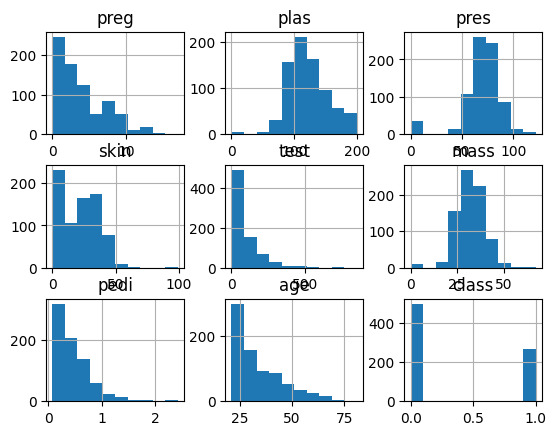

In [32]:
df.hist()

In [37]:
X["preg"] = X["preg"].apply("sqrt")

In [59]:
X["test"] = X["test"].apply("sqrt")

In [63]:
X["pedi"] = X["pedi"].apply("log")


In [73]:
prueba = X.copy()
prueba["target"] = y
prueba


,preg,plas,pres,skin,test,mass,pedi,age,target
0,2.449490,148,72,35,0.000000,33.6,-0.466809,50,1
1,1.000000,85,66,29,0.000000,26.6,-1.046969,31,0
2,2.828427,183,64,0,0.000000,23.3,-0.397497,32,1
3,1.000000,89,66,23,9.695360,28.1,-1.789761,21,0
4,0.000000,137,40,35,12.961481,43.1,0.827678,33,1
...,...,...,...,...,...,...,...,...,...
763,3.162278,101,76,48,13.416408,32.9,-1.766092,63,0
764,1.414214,122,70,27,0.000000,36.8,-1.078810,27,0
765,2.236068,121,72,23,10.583005,26.2,-1.406497,30,0
766,1.000000,126,60,0,0.000000,30.1,-1.052683,47,1


In [77]:
matriz_correlaciones = prueba.corr(numeric_only=True)
matriz_correlaciones["target"].sort_values(ascending=False)

target    1.000000
plas      0.466581
mass      0.292695
age       0.238356
pedi      0.180612
preg      0.180167
skin      0.074752
test      0.072343
pres      0.065068
Name: target, dtype: float64

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

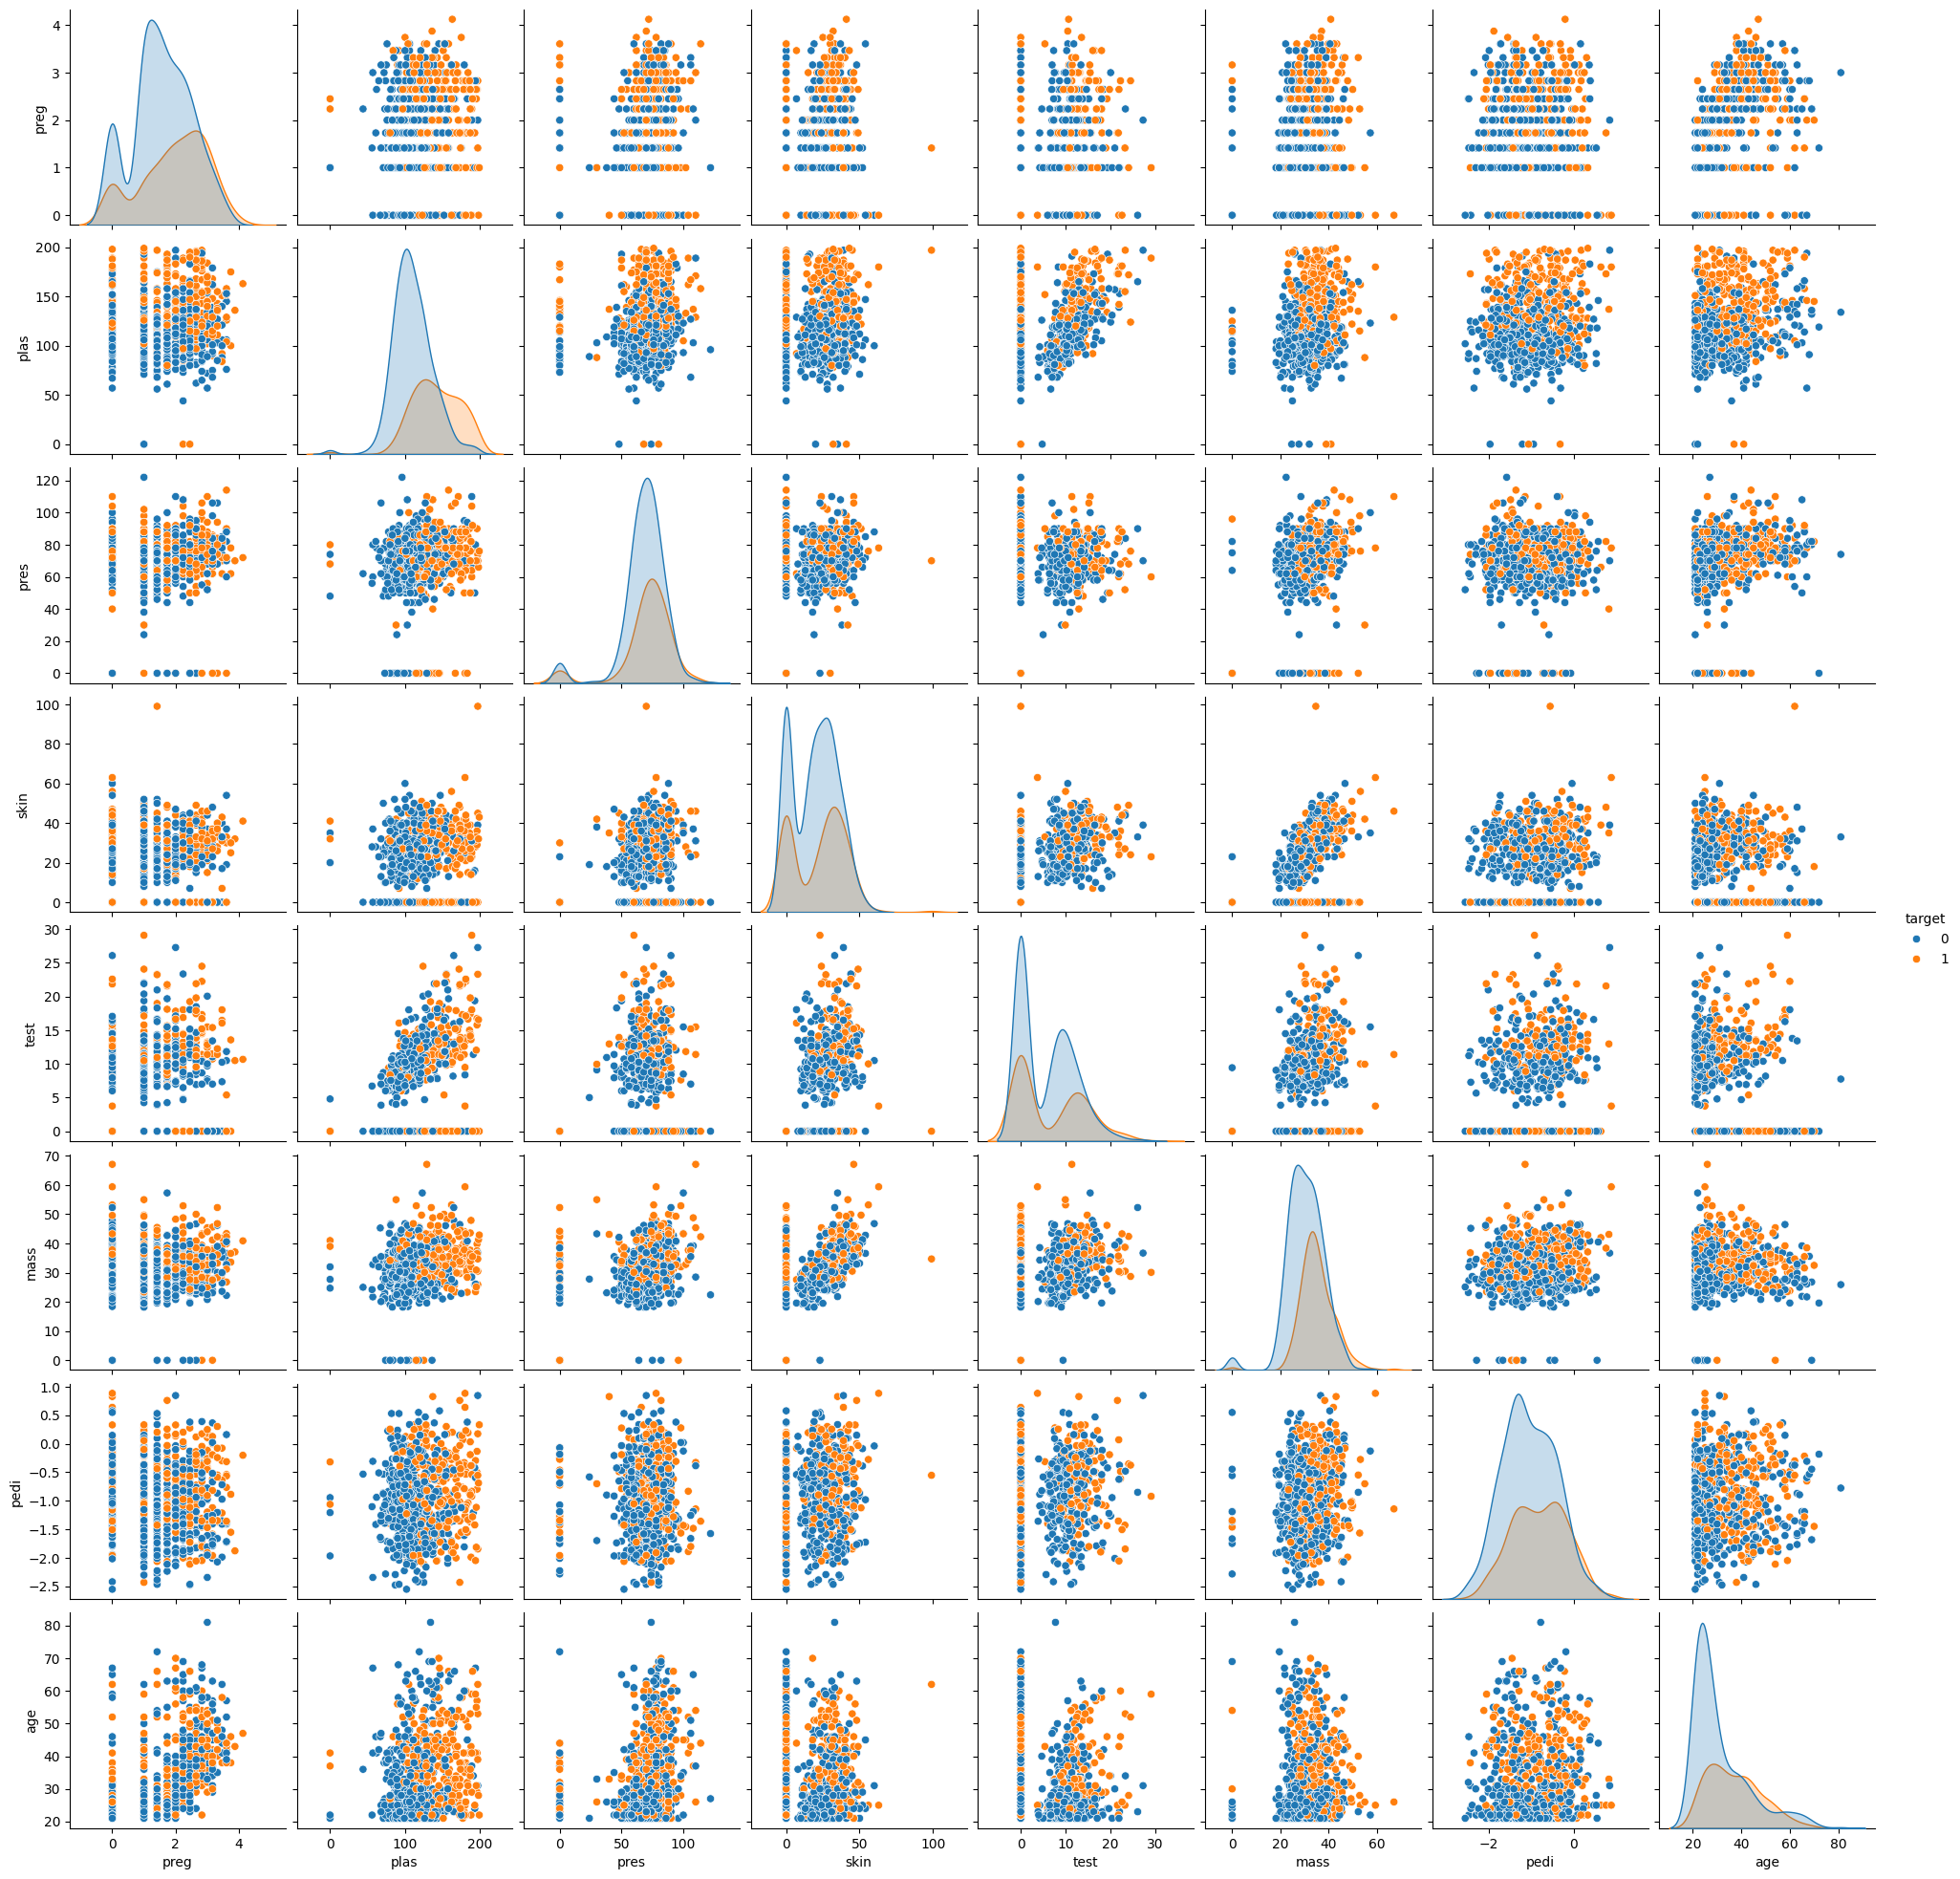

<Figure size 640x480 with 0 Axes>

In [83]:
plt.figure()
sns.pairplot(prueba,hue="target")
plt.figure()

In [84]:
X.drop(columns=["pres"],inplace=True)

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [91]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [85]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
rnd_clf = RandomForestClassifier(random_state=42)
grd_clf = GradientBoostingClassifier(random_state=42)
xgb_clf = XGBClassifier(random_state=42)
lgm_clf = LGBMClassifier(random_state=42)
ctb_clf = CatBoostClassifier(random_state=42)
log_clf = LogisticRegression(random_state=42)
modelos = [rnd_clf,grd_clf,xgb_clf,lgm_clf,ctb_clf,log_clf]

In [93]:
for modelo in modelos:
    print(modelo)
    if modelo == "log_clf":
        valores = cross_val_score(modelo,X_train_scaled,y_train,cv=5,scoring="accuracy")
    else:
        valores = cross_val_score(modelo,X_train_scaled,y_train,cv=5,scoring="accuracy")
    print(np.mean(valores))
    print("*"*50)


RandomForestClassifier(random_state=42)
0.7573370651739304
**************************************************
GradientBoostingClassifier(random_state=42)
0.7654938024790084
**************************************************
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)
0.7329334932693

Elegimos xgboost

In [100]:
from sklearn.model_selection import RandomizedSearchCV

rf_clf1 = RandomForestClassifier()

params_grid = {
    "n_estimators": [100,200,400],
    "max_depth": [2,4,10],
    "min_samples_leaf": [10,20,40],
    "max_features": ["sqrt","log2",None],
    "max_samples": [0.3,0.6,1]
}

rnd_grid = RandomizedSearchCV(rf_clf1, 
                               cv = 3,
                               n_iter = 1000,
                               param_distributions= params_grid, 
                               scoring = "accuracy",
                               n_jobs=-1)
rnd_grid.fit(X_train,y_train)


C:\Users\David\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 243 is smaller than n_iter=1000. Running 243 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=1000,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_samples': [0.3, 0.6, 1],
                                        'min_samples_leaf': [10, 20, 40],
                                        'n_estimators': [100, 200, 400]},
                   scoring='accuracy')

In [101]:
predictions_rnd = rnd_grid.best_estimator_.predict(X_test)
print(classification_report(y_test,predictions_rnd))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.62      0.67        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



In [97]:
xgb_grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=np.float64(0.5), colsample_bynode=None,
              colsample_bytree=np.float64(0.7999999999999999), device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [98]:
xgb_grid.best_score_

np.float64(0.7817631117487646)

In [102]:
predictions = xgb_grid.best_estimator_.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

